In [1]:
import numpy as np
from scipy.spatial import KDTree
from scipy.spatial.distance import pdist, squareform

from time import time

import matplotlib.pyplot as plt
from matplotlib import colors

from scipy.spatial import KDTree
from time import time

In [2]:
number_of_points = [1000, 50000, 100000]
data_spreads = [0.1, 1, 10, 25, 50, 100, 1000, 10000]
list_of_pair_radius = [0.001, 0.01, 0.1, 1, 20, 100, 1000, 10000]

In [3]:
def build_tree_and_find_pairs(points, radius):
    build_start_time = time()
    kd_tree = KDTree(points)
    build_time = time() - build_start_time

    query_pairs_start_time = time()
    pairs = kd_tree.query_pairs(radius)
    query_pairs_time = time() - query_pairs_start_time

    return build_time, query_pairs_time, pairs

def run_pdist(points):
    pdist_time = time()
    result = pdist(points) < 0.05
    return (time() - pdist_time), result

In [4]:

def verify_results(pdist_result, kdd_pairs):
    unmatched_count = 0
    unmatched_pairs = []
    square = squareform(pdist_result)
    for pair in kdd_pairs:
        if not (square[pair[0], pair[1]] and square[pair[1], pair[0]]):
            unmatched_count += 1
            unmatched_pairs.append(pair)

    print(f"Unmatched count:{unmatched_count}")

def run_and_plot(data_spread, number_of_points=[1000, 10000, 100000], list_of_pair_radius=[0.001, 0.01, 0.1, 1, 20, 100, 1000], compare_pdist=False, verify_result=False):
    applicable_list_of_radius = [radius for radius in list_of_pair_radius if radius <= data_spread / 10]

    build_times_map = {}
    query_pairs_times_map = {}
    pdist_times_map = {}

    for points_count in number_of_points:
        # -0.5 to create negative numbers as well
        points = (np.random.rand(points_count, 2) - 0.5) * data_spread

        if points_count not in build_times_map:
            build_times_map[points_count] = []
        if points_count not in query_pairs_times_map:
            query_pairs_times_map[points_count] = []
        if points_count not in pdist_times_map:
            pdist_times_map[points_count] = []

        for radius in applicable_list_of_radius:
            build_time, query_pairs_time, pairs = build_tree_and_find_pairs(points, radius)

            build_times_map[points_count].append(build_time)
            query_pairs_times_map[points_count].append(query_pairs_time)

            if compare_pdist:
                pdist_time, result = run_pdist(points)
                pdist_times_map[points_count].append(pdist_time)

                if verify_result:
                    verify_results(result, pairs)


    fig, axes = plt.subplots(1, len(number_of_points), figsize=(25,5), squeeze=False)
    fig.suptitle(f"Data spread: {data_spread}")

    for index, points_count in enumerate(number_of_points):
        # print(f"{build_times_map[points_count]}")
        # print(f"{query_pairs_times_map[points_count]}")
        axes[0, index].set_title(f"Points: {points_count}")
        axes[0, index].plot(applicable_list_of_radius, build_times_map[points_count], 'tab:blue', label = "Build Time", linestyle="solid")
        axes[0, index].plot(applicable_list_of_radius, query_pairs_times_map[points_count], 'tab:green', label = "Query Pairs Time", linestyle="dashed")
        if compare_pdist:
            axes[0, index].plot(applicable_list_of_radius, pdist_times_map[points_count], 'tab:red', label = "Pdist Time", linestyle=":")
            plt.yscale('log')
        axes[0, index].legend()

    for ax in axes.flat:
        y_label = 'Time'
        if compare_pdist:
            y_label = 'Time (Log)'
        ax.set(xlabel='Radius', ylabel=y_label)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax in axes.flat:
    #     ax.label_outer()

    plt.show()

Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0
Unmatched count:0


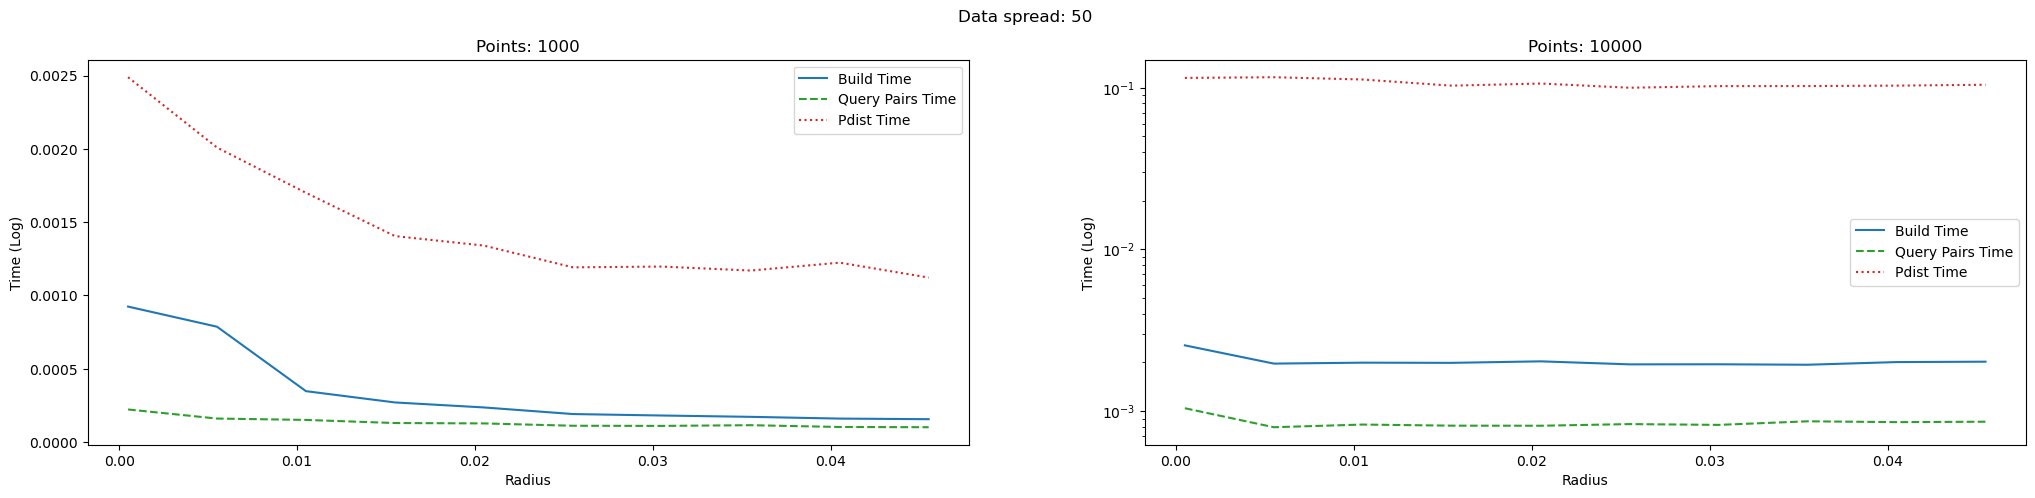

In [5]:
# Radius is not relevant to build-time of KdTree and Pdist, Radius wise-performance is only relevant to query-pairs.
run_and_plot(50, number_of_points=[1000, 10000], list_of_pair_radius=[50 * (level/100000) for level in range(1, 100, 10)], compare_pdist=True, verify_result=True)